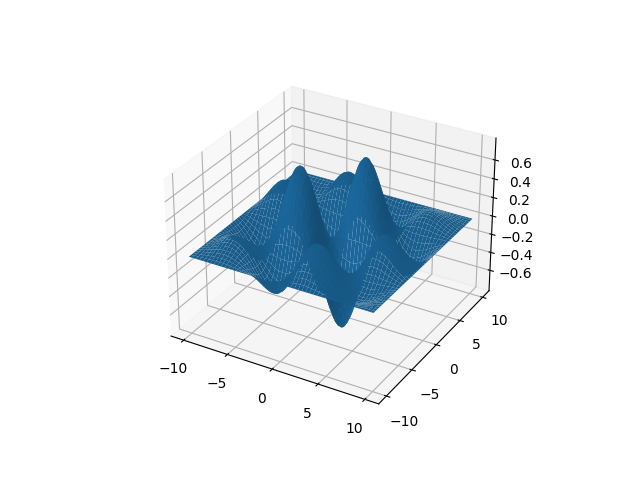

In [1]:
%matplotlib widget
import matplotlib.pyplot as plt
import numpy as np

xres = 200
yres = 200
tr = 500
c = 20
tres = 0.9/(xres*c)
wav = np.zeros([tr, xres, yres])
x0 = np.linspace(-10, 10, xres)
y0 = np.linspace(-10, 10, yres)


XX, YY = np.meshgrid(x0, y0)


wav[0] = np.exp(-(XX**2 + YY**2)/50) * np.sin(2*np.pi*XX/10) * np.sin(2*np.pi*YY/10)

#erste rechnung
# for j in range(1, len(wav[0])-1):
#     wav[1][j] = (c**2 * (wav[0][j-1] + wav[0][j+1] - 2*wav[0][j])*(tres*xres)**2 + wav[0][j])

# #iteration
# for i in range(1, len(wav)-1):
#     for j in range(1, len(wav[0])-1):
#         wav[i + 1][j] = c**2 * (wav[i][j-1] + wav[i][j+1] - 2*wav[i][j] \
#             )*(tres*xres)**2 + 2*wav[i][j] - wav[i-1][j]

fig, ax = plt.subplots(subplot_kw={"projection": "3d"})
ax.plot_surface(XX, YY, wav[0])
#display(fig)